# Can we predict who would've survived the Titanic?

Performing EDA on the Kaggle Titanic dataset with Python

# Step 0 : Why EDA?

1. When solving a Machine Learning - we often encounter datasets that are very new to us and 
in order to solve the problem, we will have to first understand the dataset that is in hand.

2. And this process is called as the EDA - Exploratory Data Analysis - which means we are trying to figure out more about the data, in order to build a model the works the best

3. EDA is an iterative process.

4. There's no one way to do it either.

# Step 1: Download the data

The first step is to download the problem dataset
The dataset used for this problem is the Kaggle Titanic Dataset - https://www.kaggle.com/c/titanic/data

# Step 2: Importing the libraries needed to work through the notebook

In [74]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Step 3 Loading in the data


In [75]:
# Import train & test data 
train = pd.read_csv('/Users/priyashaprasad/Downloads/titanic/train.csv')
test = pd.read_csv('/Users/priyashaprasad/Downloads/titanic/test.csv')
gender_submission = pd.read_csv('/Users/priyashaprasad/Downloads/titanic/gender_submission.csv') # example of what a submission should look like


In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train.shape

(891, 12)

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test.shape

(418, 11)

In [80]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Descriptions

Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

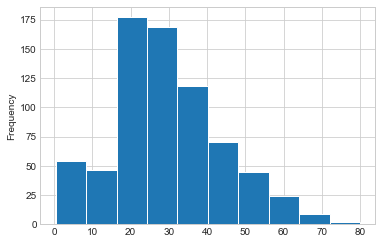

In [81]:
#distribution of age feature
train.Age.plot.hist() 

In [82]:
#description of numeric features in the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 4 Checking for missing values

What missing values are there?

In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

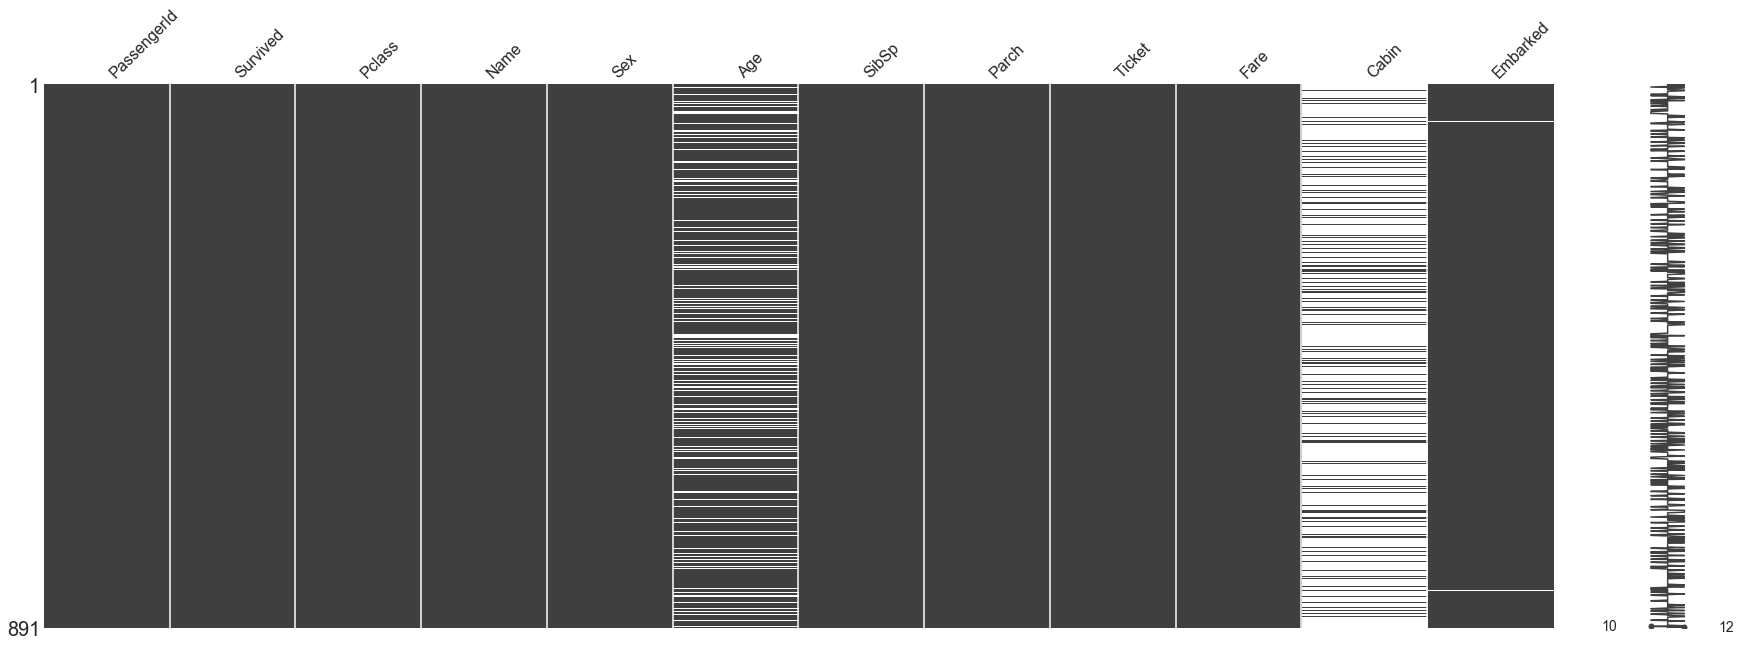

In [84]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

In [85]:
age = (177.0/891.0)*100
age

19.865319865319865

Almost 20% of the data is missing in Age

In [86]:
cabin = (687.0/891.0)*100
cabin

77.10437710437711

Almost 77% of the data is missing in Cabin

# Step 5 Identify the datatypes in the df

In [87]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# The general rule of thumb: 

1. Features with a datatype of object could be considered categorical features
2. Features which are floats or ints (numbers) could be considered numerical features.
3. Sometimes, if we dig deeper numerical features might be categorical.
4. The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.
5. Ideally, all the features that we will be using for training the model should be encoded into a numerical value of some kind.


# Step 6 Explore each of the features in the dataset individually

To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been 
sorted into some kind of category) and another for exploring continuous variables.

In [88]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Feature : Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others, the dependent variable

0    549
1    342
Name: Survived, dtype: int64


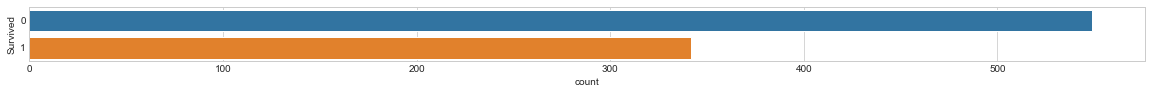

In [90]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [91]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [92]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [93]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# 2. Feature : Pclass

Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

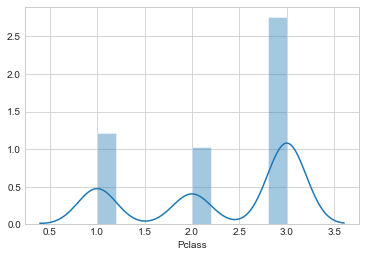

In [94]:
sns.distplot(train.Pclass)

3    491
1    216
2    184
Name: Pclass, dtype: int64


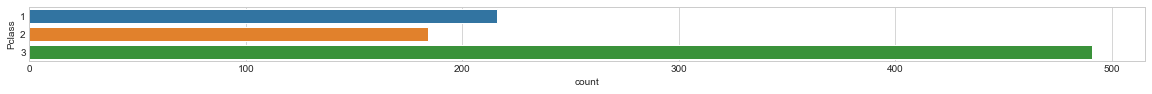

In [95]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Pclass', data=train);
print(train.Pclass.value_counts())

In [96]:
# Let's add this to our subset dataframes

df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [97]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [98]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# 3. Feature : Name

Description: The name of the passenger.

In [99]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [100]:
train.Name.nunique()

891

1. Each row has a unique name. 
2. This is similar to that of the passanger ID (which is also unique)
3. Note: Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

# 4. Feature: Sex

Description: The sex of the passenger (male or female).

male      577
female    314
Name: Sex, dtype: int64


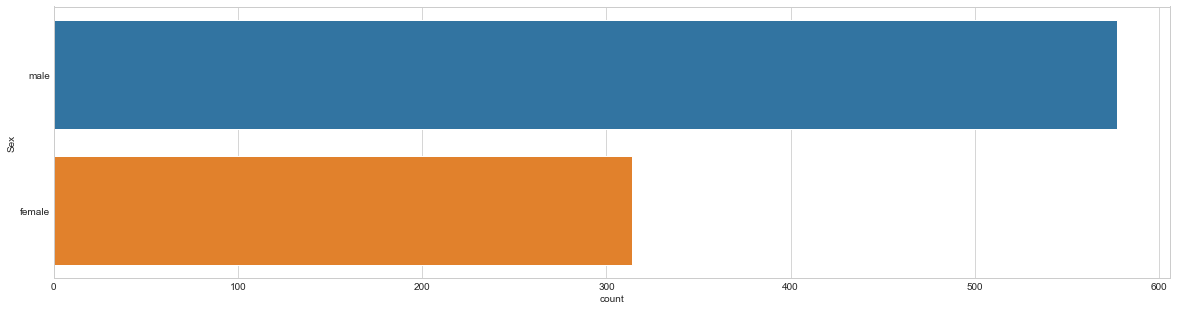

In [101]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)
print(train.Sex.value_counts());

In [102]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

In [103]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

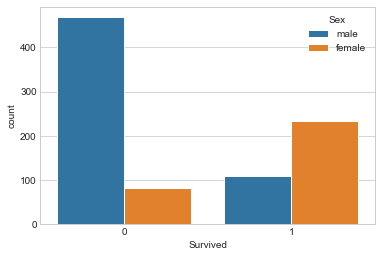

In [104]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

Not many people survived. But of those who did, more were female.

In [105]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [106]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [107]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


# 5. Feature Age

Description: The age of the passenger.

In [108]:
# How many missing values does age have?
# almost 20 % of the values are missing
train.Age.isnull().sum()


177

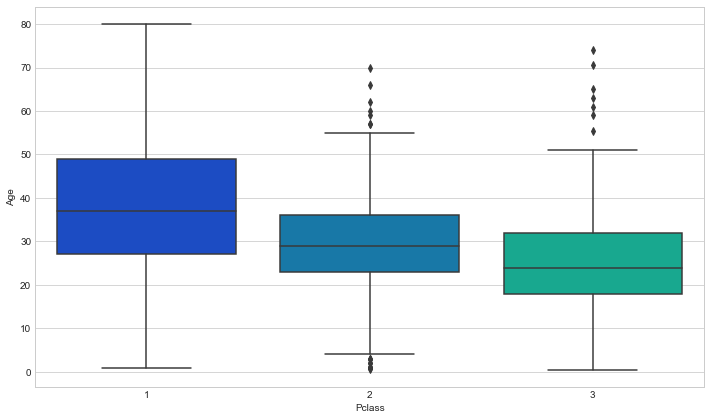

In [109]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

1. For pclass 1: The median age is around 37
2. For pclass 2: The median age is around 29
3. For pclass 3: The median age is around 


So we are going to be using this logic to impute the missing age values

In [110]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [111]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now, we have successfully imputed the missing values for age



In [112]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 6 . Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [113]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [114]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.



In [115]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [116]:
df_bin.head()

,Survived,Pclass,Sex,SibSp
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


In [117]:
df_con.head()

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0


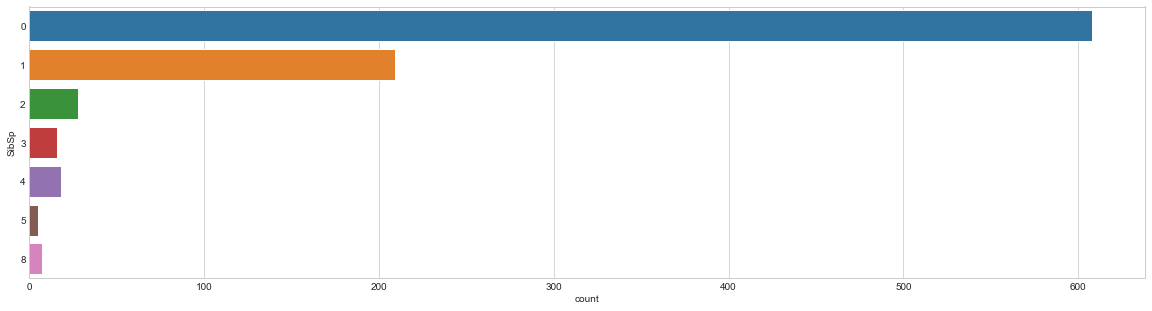

In [118]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="SibSp", data=train)

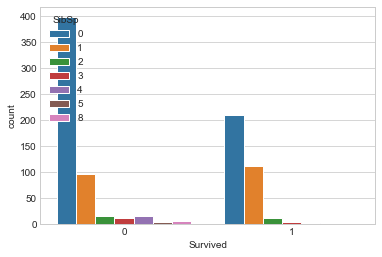

In [121]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train)

# 7. Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.


In [122]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [123]:
#What values are there?
train.Parch.value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

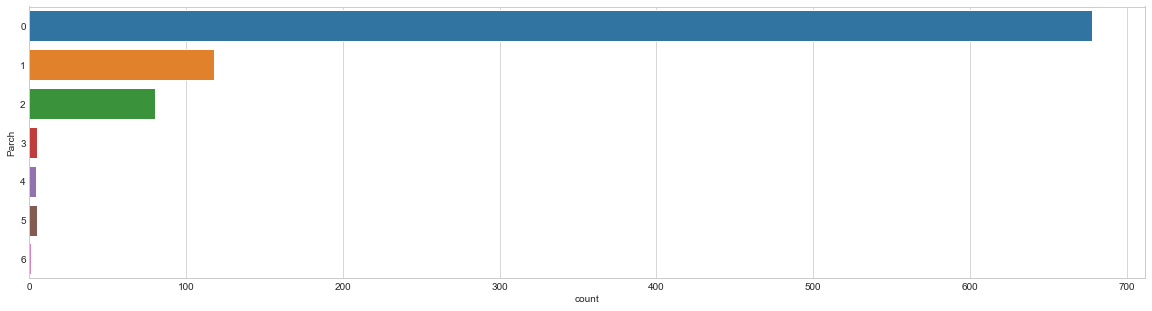

In [125]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Parch", data=train)

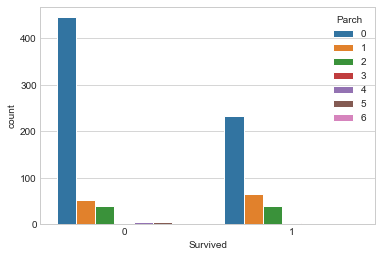

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=train)

In [127]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [128]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [129]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


# 8. Feature: Ticket

Description: The ticket number of the boarding passenger.



In [130]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

In [131]:
train.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [132]:
train.Ticket.nunique()

681

681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

# 9. Feature: Fare

In [134]:
# How many missing values does Fare have?
train.Fare.isnull().sum()


0

In [135]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [136]:
train.Fare.nunique()

248

Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.



In [137]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [138]:
df_bin.Fare.value_counts()


(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

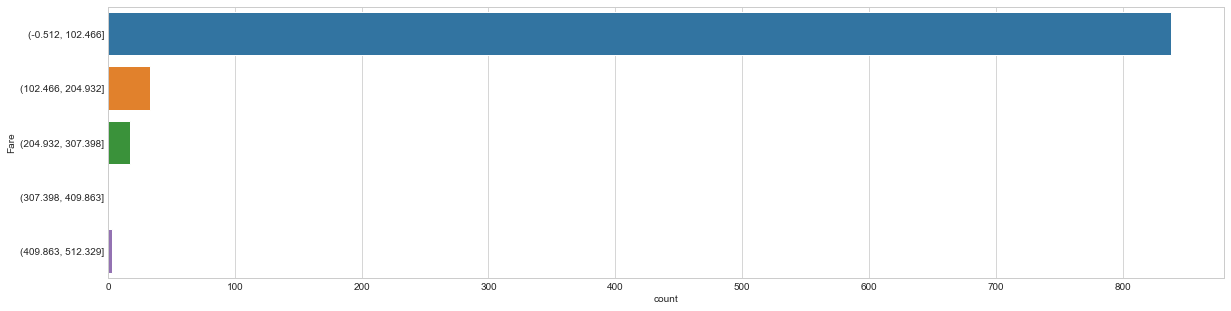

In [140]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Fare", data=df_bin)

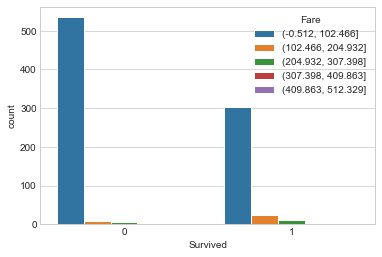

In [141]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Fare',data=df_bin)

# 10 Feature: Cabin

Description: The cabin number where the passenger was staying.



In [142]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

Almost 77% of the feature is null

In [143]:
# What do the Cabin values look like?
train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.



# 11. Feature: Embarked

Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [144]:
train.Embarked.isnull().sum()

2

In [145]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

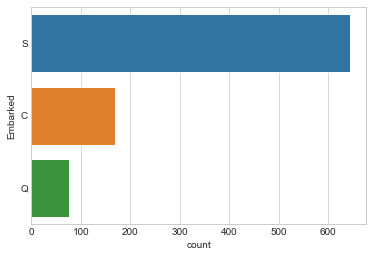

In [146]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

How can we deal with the 2 missing values of Embarked? Since, there are only 2 records, we are going to remove them.




In [147]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [148]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.